# Speaker diarization on Danish news

A minimal example on how to run speaker diarization on Danish news.
First, let's download some audio.

In [1]:
url="https://drod21p.akamaized.net/all/clear/none/75/64d6943bd1422b0be8dad675/14842322325/download/Radioavisen_DRLYD2022Sep_ST_AudioMain_192.mp3"

In [2]:
!curl -L -o audio.mp3 "{url}"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 4221k  100 4221k    0     0  21.4M      0 --:--:-- --:--:-- --:--:-- 21.4M


Let's have a listen

In [3]:
from IPython.display import Audio as IPythonAudio
IPythonAudio("audio.mp3")

Now let's install PyAnnote

In [ ]:
!pip install -qq https://github.com/pyannote/pyannote-audio/archive/refs/heads/develop.zip
!pip install -qq ipython==7.34.0

Now let's prepare HuggingFace

To load the speaker diarization pipeline,

* accept the user conditions on [hf.co/pyannote/speaker-diarization](https://hf.co/pyannote/speaker-diarization)
* accept the user conditions on [hf.co/pyannote/segmentation](https://hf.co/pyannote/segmentation)
* login using `notebook_login` below

In [ ]:
from huggingface_hub import notebook_login
notebook_login()

We are now ready to run the model on the audio

In [4]:
import torch
from pyannote.audio import Pipeline
pipeline = Pipeline.from_pretrained("pyannote/speaker-diarization", use_auth_token=True)
pipeline=pipeline.to(torch.device("cuda"))
diarization = pipeline("audio.mp3")

torchvision is not available - cannot save figures
Lightning automatically upgraded your loaded checkpoint from v1.5.4 to v2.0.6. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint --file ../../.cache/torch/pyannote/models--pyannote--segmentation/snapshots/c4c8ceafcbb3a7a280c2d357aee9fbc9b0be7f9b/pytorch_model.bin`


Model was trained with pyannote.audio 0.0.1, yours is 2.1.1. Bad things might happen unless you revert pyannote.audio to 0.x.
Model was trained with torch 1.10.0+cu102, yours is 2.0.1+cu117. Bad things might happen unless you revert torch to 1.x.


This is the built-in visualization of the speakers

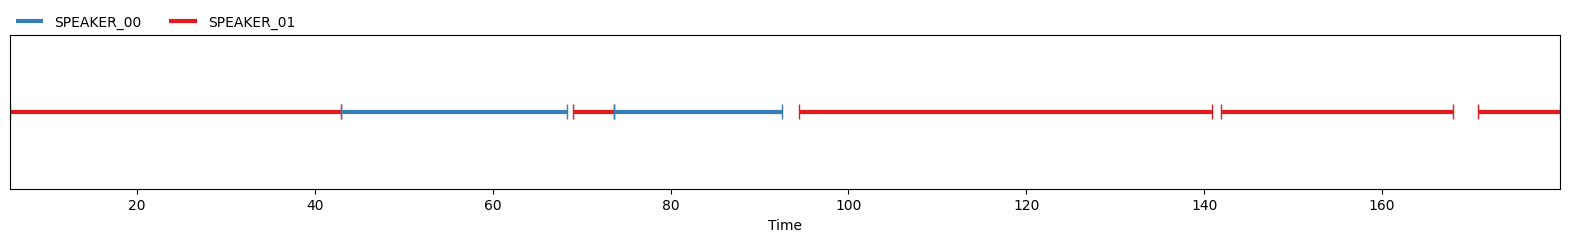

In [5]:
diarization

Let's print a textual representation

In [6]:
def minsecs(seconds):
  return f"{int(seconds // 60):02d}:{(seconds % 60):05.2f}"


In [7]:
for turn, _, speaker in diarization.itertracks(yield_label=True):
    print(f"start={minsecs(turn.start)} stop={minsecs(turn.end)} speaker_{speaker}")

start=00:05.74 stop=00:42.91 speaker_SPEAKER_01
start=00:42.93 stop=01:08.40 speaker_SPEAKER_00
start=01:09.02 stop=01:13.64 speaker_SPEAKER_01
start=01:13.64 stop=01:32.48 speaker_SPEAKER_00
start=01:34.50 stop=02:20.83 speaker_SPEAKER_01
start=02:21.83 stop=02:48.01 speaker_SPEAKER_01
start=02:50.74 stop=02:59.99 speaker_SPEAKER_01
